In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 7.6 MB/s eta 0:00:00


In [13]:
from ultralytics import YOLO


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
def detect_objects(model, source, folder, object_type):
    np_model = YOLO(model)
    src = np_model.track(source, persist=True)
    for i, result in enumerate(src):
        result[0].save_crop(folder, file_name=f'{object_type}{i}')
    print('done')

def detect_cars(model, source, folder):
    detect_objects(model, source, folder, 'car')

def detect_plates(model, source, folder):
    detect_objects(model, source, folder, 'plate')

In [ ]:
backbone = YOLO("yolov8n.pt")
detect_cars("yolov8n.pt", '/content/Untitled.jpg', '/content/result')

100%|██████████| 6.23M/6.23M [00:00<00:00, 85.2MB/s]


requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.0s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


image 1/1 /content/Untitled.jpg: 640x480 1 car, 466.8ms
Speed: 19.2ms preprocess, 466.8ms inference, 42.9ms postprocess per image at shape (1, 3, 640, 480)
done


In [15]:
import os

os.path.abspath("..")

'c:\\dev\\gen projects\\ANPR'

In [16]:
ARTIFACT_PATH = os.path.join(os.path.abspath(".."),"artifacts")
ARTIFACT_PATH

'c:\\dev\\gen projects\\ANPR\\artifacts'

In [19]:
detect_plates(os.path.join(ARTIFACT_PATH,"models","best.torchscript"), os.path.join(ARTIFACT_PATH,"samples","pandemic.jpg"), os.path.join(ARTIFACT_PATH,"results"))

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


Loading c:\dev\gen projects\ANPR\artifacts\models\best.torchscript for TorchScript inference...

image 1/1 c:\dev\gen projects\ANPR\artifacts\samples\pandemic.jpg: 640x640 1 License_Plate, 916.7ms
Speed: 25.6ms preprocess, 916.7ms inference, 12.1ms postprocess per image at shape (1, 3, 640, 640)
done


In [11]:
import cv2
import numpy as np
import functools
import matplotlib.pyplot as plt
image = cv2.imread(os.path.join(ARTIFACT_PATH,"results","License_Plate","car.jpg"))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (1,1), 0)

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

cv2.imshow("test", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

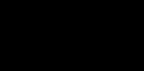

In [ ]:
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")
cv2_imshow(mask)

In [ ]:
total_pixels = image.shape[0] * image.shape[1]
lower = total_pixels // 70
upper = total_pixels // 20
print(total_pixels)

10224


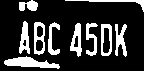

In [ ]:
for(i, label) in enumerate(np.unique(labels)):

  if label == 0:
    continue

  labelMask = np.zeros(thresh.shape, dtype="uint8")
  labelMask[labels == label] = 255
  numPixels = cv2.countNonZero(labelMask)


  if numPixels > lower and numPixels < upper :
    mask = cv2.add(mask, labelMask)

cv2_imshow(mask)

In [ ]:
cnts,_ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect (c) for c in cnts]


In [ ]:
def compare(rect1, rect2):
  if abs(rect1[1] - rect2[1]) > 10:
    return rect1[1] - rect2[1]
  else:
    return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare))

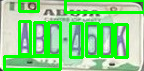

In [ ]:
for bbox in boundingBoxes:
    x, y, w, h = bbox
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)